In [2]:
dict_usr={'A':100000,
         'B':25000,
         'C':20000,
         'D':6000}

# 赋值：虚拟墨卡托

In [3]:
import pandas as pd
import numpy as np

# 网格尺寸设置
grid_size = 500  # 每个格子500米
num_cells = 200  # 200 x 200个格子

# 计算整个区域的总尺寸
total_size = grid_size * num_cells

# 计算起始坐标（左上角的网格中心）
start_x = -total_size / 2 + grid_size / 2
#左一半+半个格子
start_y = total_size / 2 - grid_size / 2
#上一半-半个格子

# 创建坐标网格
x_coords = [start_x + i * grid_size for i in range(num_cells)]
#加号，因为x轴从左往右排列
y_coords = [start_y - i * grid_size for i in range(num_cells)]  
# 减号，因为y轴从上往下排列

# 创建网格中心坐标的网格矩阵
xx, yy = np.meshgrid(x_coords, y_coords)

# 将坐标矩阵转换为DataFrame
df = pd.DataFrame({
    'Mercator_X': xx.ravel(),
    'Mercator_Y': yy.ravel()
})

# 添加网格索引，从1开始
df['Grid_X_Index'] = np.tile(np.arange(1, num_cells + 1), num_cells)
df['Grid_Y_Index'] = np.repeat(np.arange(1, num_cells + 1), num_cells)


df


,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index
0,-49750.0,49750.0,1,1
1,-49250.0,49750.0,2,1
2,-48750.0,49750.0,3,1
3,-48250.0,49750.0,4,1
4,-47750.0,49750.0,5,1
...,...,...,...,...
39995,47750.0,-49750.0,196,200
39996,48250.0,-49750.0,197,200
39997,48750.0,-49750.0,198,200
39998,49250.0,-49750.0,199,200


# 赋值：虚拟Subzone_id

In [4]:
df['subzone_id']=(df['Grid_X_Index']-1)+(df['Grid_Y_Index']-1)*200
df

,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id
0,-49750.0,49750.0,1,1,0
1,-49250.0,49750.0,2,1,1
2,-48750.0,49750.0,3,1,2
3,-48250.0,49750.0,4,1,3
4,-47750.0,49750.0,5,1,4
...,...,...,...,...,...
39995,47750.0,-49750.0,196,200,39995
39996,48250.0,-49750.0,197,200,39996
39997,48750.0,-49750.0,198,200,39997
39998,49250.0,-49750.0,199,200,39998


# 城市D

In [5]:
sp=pd.read_csv('../../data/sigspatial/cityD_challengedata.csv')

In [6]:
sp

,uid,d,t,x,y
0,0,0,13,133,103
1,0,0,14,143,98
2,0,0,16,162,99
3,0,0,17,149,97
4,0,0,18,144,98
...,...,...,...,...,...
8418130,5999,74,37,999,999
8418131,5999,74,38,999,999
8418132,5999,74,39,999,999
8418133,5999,74,46,999,999


In [7]:
sp.sort_values(by=['uid', 'd', 't'], inplace=True)
sp

,uid,d,t,x,y
0,0,0,13,133,103
1,0,0,14,143,98
2,0,0,16,162,99
3,0,0,17,149,97
4,0,0,18,144,98
...,...,...,...,...,...
8418130,5999,74,37,999,999
8418131,5999,74,38,999,999
8418132,5999,74,39,999,999
8418133,5999,74,46,999,999


# 选取前60天的

999是未知值，所以不要，只取前60天的

In [14]:
sp=sp[sp['d']<60]
sp

,uid,d,t,x,y
0,0,0,13,133,103
1,0,0,14,143,98
2,0,0,16,162,99
3,0,0,17,149,97
4,0,0,18,144,98
...,...,...,...,...,...
7593397,5999,59,43,91,118
7593398,5999,59,44,92,118
7593399,5999,59,45,91,118
7593400,5999,59,46,91,118


In [15]:
sp['x'].min(),sp['x'].max()

(1, 200)

In [16]:
sp['y'].min(),sp['y'].max()

(1, 200)

# grid id和墨卡托坐标合并

In [17]:
merged_data = pd.merge(sp, 
                       df, 
                       left_on=['x', 'y'],
                       right_on=['Grid_X_Index', 'Grid_Y_Index'], 
                       how='left')
merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532
1,0,0,14,143,98,21250.0,1250.0,143,98,19542
2,0,0,16,162,99,30750.0,750.0,162,99,19761
3,0,0,17,149,97,24250.0,1750.0,149,97,19348
4,0,0,18,144,98,21750.0,1250.0,144,98,19543
...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490


In [18]:
merged_data['Mercator_X'].mean(),merged_data['Mercator_Y'].mean()

(9823.449273397202, 8117.109728565912)

In [19]:
merged_data['Mercator_X'].std(),merged_data['Mercator_Y'].std()

(22870.103269837746, 20357.961053894276)

# 可视化整体热力图

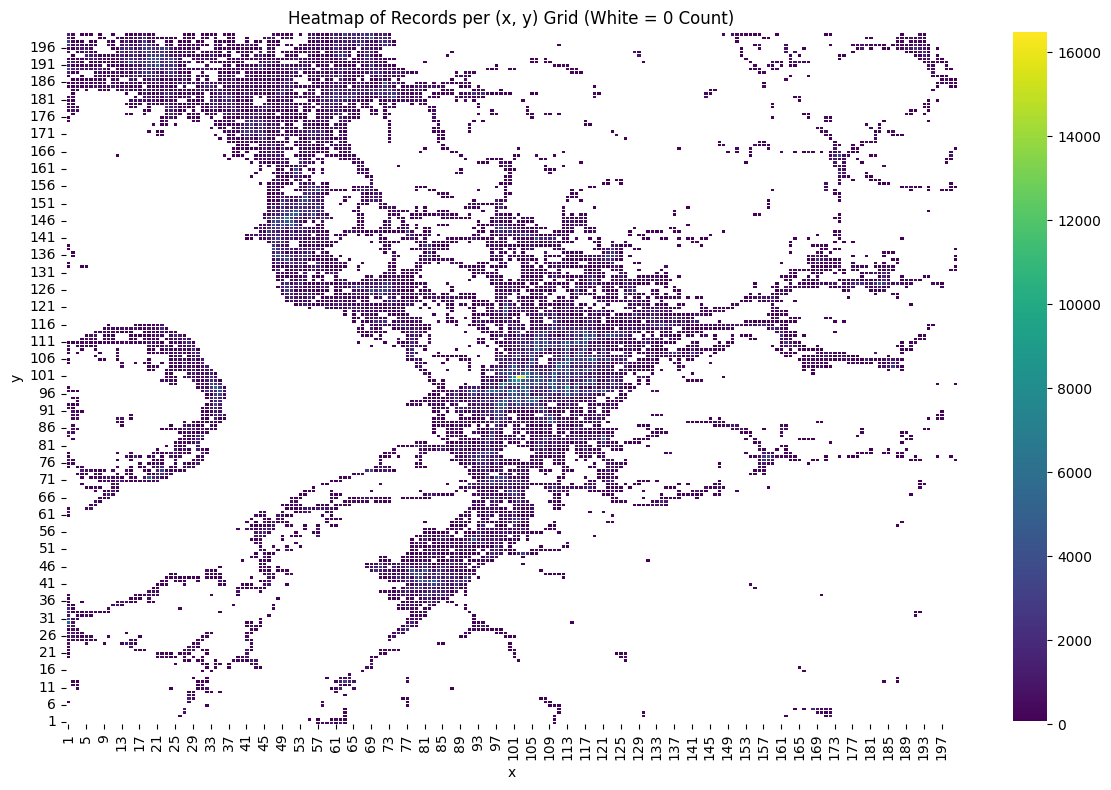

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# 构建记录热度的透视表
heatmap_data = merged_data.groupby(['x', 'y']).size().unstack(fill_value=0)

# 创建一个viridis colormap副本，并设置最低值为白色
base_cmap = plt.cm.viridis
new_colors = base_cmap(np.linspace(0, 1, 256))
new_colors[0] = np.array([1, 1, 1, 1])  # 将最小值（0）设置为白色 (RGBA)
new_cmap = ListedColormap(new_colors)

# 画热图
plt.figure(figsize=(12, 8))
ax=sns.heatmap(heatmap_data, cmap=new_cmap, linewidths=0.5)

# 关键：反转 y 轴方向，让 (0,0) 在左下角
ax.invert_yaxis()

plt.title('Heatmap of Records per (x, y) Grid (White = 0 Count)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()


# 计算时间间隔

In [21]:
merged_data['total_hours'] = merged_data['d'] * 24 + merged_data['t'] * 0.5
merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0
...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0


In [22]:
merged_data['duration(h)'] = merged_data.groupby('uid')['total_hours'].diff().shift(-1)
merged_data['duration(h)'].fillna(0.1, inplace=True)
merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h)
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5


In [ ]:
merged_data['duration(h)'].describe()

In [23]:
merged_data['duration(h)'].max()

1142.0

In [24]:
merged_data[merged_data['duration(h)']>=24]


,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h)
1144,0,47,44,117,94,8250.0,3250.0,117,94,18716,1150.0,39.0
1742,1,16,32,161,67,30250.0,16750.0,161,67,13360,400.0,25.0
2065,1,32,16,32,5,-34250.0,47750.0,32,5,831,776.0,56.5
3441,2,49,14,178,38,38750.0,31250.0,178,38,7577,1183.0,35.0
5000,4,3,42,186,67,42750.0,16750.0,186,67,13385,93.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6695026,5996,6,37,200,4,49750.0,48250.0,200,4,799,162.5,24.0
6695429,5997,13,13,191,68,45250.0,16250.0,191,68,13590,318.5,75.0
6696056,5998,18,34,82,156,-9250.0,-27750.0,82,156,31081,449.0,713.5
6696490,5999,15,33,110,110,4750.0,-4750.0,110,110,21909,376.5,219.0


## 拆分user_id

对于每个 uid，如果相邻两条记录之间的时间间隔（duration(h)）大于24 小时，则视为“轨迹中断”，需要断开并重新编号子用户 ID（子轨迹段）。

每段新的子用户轨迹都赋予一个新的 new_uid。

最后只保留轨迹长度大于 10 条记录的子用户轨迹。

In [25]:
#标记每个原uid中“断点”（duration > 24h）的位置
merged_data['break_flag'] = (merged_data['duration(h)'] > 24).astype(int)


merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0


In [26]:
# 但是此时>5的断点会被视为新id的起始点，这是不对的（这个点是上一个id的最后一个点）

#所以break flag需要向下平移一个
merged_data['break_flag_shifted'] = merged_data.groupby('uid')['break_flag'].shift(fill_value=0)
merged_data


,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag,break_flag_shifted
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,0
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,0
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,0
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,0


In [27]:
# 为每个 uid 分段（累加 break_flag）
# 举个例子：uid=0，有三条记录，第2条与第3条相差6h，那么它们属于两个段
merged_data['sub_id'] = merged_data.groupby('uid')['break_flag_shifted'].cumsum()
merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag,break_flag_shifted,sub_id
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0,0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0,0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0,0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0,0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,0,2
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,0,2
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,0,2
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,0,2


In [28]:
# 合并原始uid和sub_id，形成唯一的新uid
merged_data['new_uid'] = merged_data['uid'].astype(str) + '_' + merged_data['sub_id'].astype(str)
merged_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag,break_flag_shifted,sub_id,new_uid
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0,0,0_0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0,0,0_0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0,0,0_0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0,0,0_0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0,0,0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,0,2,5999_2
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,0,2,5999_2
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,0,2,5999_2
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,0,2,5999_2


In [30]:
#保留轨迹长度 > 10 的 new_uid
valid_uids = merged_data['new_uid'].value_counts()
valid_uids

new_uid
3549_0    2735
912_0     2734
2165_0    2644
1396_0    2635
4064_0    2503
          ... 
4508_1       1
3152_3       1
3774_8       1
3152_8       1
1069_0       1
Name: count, Length: 20456, dtype: int64

In [31]:
valid_uids_idx = valid_uids[valid_uids > 10].index
filtered_data = merged_data[merged_data['new_uid'].isin(valid_uids_idx)].copy()
filtered_data['duration(h)']=0
filtered_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag,break_flag_shifted,sub_id,new_uid
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0,0,0,0,0_0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,0,0,0,0,0_0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0,0,0,0,0_0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0,0,0,0,0_0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,0,0,0,0,0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696501,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0,0,0,2,5999_2
6696502,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0,0,0,2,5999_2
6696503,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0,0,0,2,5999_2
6696504,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0,0,0,2,5999_2


In [32]:
filtered_data['new_uid'].unique().shape

(17965,)

In [33]:
uid_map = {old: new for new, old in enumerate(filtered_data['new_uid'].unique())}
filtered_data['new_uid'] = filtered_data['new_uid'].map(uid_map)
filtered_data.drop(columns=['break_flag', 'sub_id'], inplace=True)
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0,0,0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,0,0,0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0,0,0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0,0,0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683833,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0,0,17964
6683834,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0,0,17964
6683835,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0,0,17964
6683836,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0,0,17964


In [34]:
filtered_data['new_uid'].unique().shape[0]

17965

In [35]:
#更新 duration(h)
filtered_data.sort_values(by=['new_uid', 'total_hours'], inplace=True)
filtered_data['duration(h)'] = (
    filtered_data.groupby('new_uid')['total_hours']
    .diff()
    .shift(-1)
)

# 填充最后一个点的间隔（可选：设为 0.1 或 0.0）
filtered_data['duration(h)'].fillna(0.1, inplace=True)
filtered_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
0,0,0,13,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0
1,0,0,14,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0
2,0,0,16,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0
3,0,0,17,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0
4,0,0,18,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683833,5999,59,43,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,17964
6683834,5999,59,44,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,17964
6683835,5999,59,45,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,17964
6683836,5999,59,46,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,17964


In [55]:
filtered_data['duration(h)'].mean()*60

68.39166209593955

In [36]:
filtered_data[filtered_data['duration(h)']>24]

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid


In [37]:
filtered_data['Mercator_X'].mean(),filtered_data['Mercator_Y'].mean()

(9807.908794318473, 8113.654011362933)

In [38]:
filtered_data['Mercator_X'].std(),filtered_data['Mercator_Y'].std()

(22859.94461536162, 20353.834963293164)

# d和t处理一下

In [39]:
filtered_data['t']=filtered_data['t']//2
filtered_data['d']=filtered_data['d']%7
filtered_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
0,0,0,6,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0
1,0,0,7,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0
2,0,0,8,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0
3,0,0,8,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0
4,0,0,9,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683833,5999,3,21,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,17964
6683834,5999,3,22,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,17964
6683835,5999,3,22,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,17964
6683836,5999,3,23,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,17964


# 划分训练测试验证集

In [40]:
n_user=filtered_data['new_uid'].unique().shape[0]
n_train=int(n_user*0.7)
n_valid=int(n_user*0.8)

In [41]:
n_train_usr_idx=range(n_train)
len(n_train_usr_idx)

12575

In [42]:
n_test_usr_idx=range(n_valid,n_user)
len(n_test_usr_idx)

3593

In [43]:
n_valid_usr_idx=range(n_train,n_valid)
len(n_valid_usr_idx)

1797

In [44]:
train_data=filtered_data[filtered_data['new_uid'].isin(n_train_usr_idx)]
vali_data=filtered_data[filtered_data['new_uid'].isin(n_valid_usr_idx)]
test_data=filtered_data[filtered_data['new_uid'].isin(n_test_usr_idx)]
train_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
0,0,0,6,133,103,16250.0,-1250.0,133,103,20532,6.5,0.5,0,0
1,0,0,7,143,98,21250.0,1250.0,143,98,19542,7.0,1.0,0,0
2,0,0,8,162,99,30750.0,750.0,162,99,19761,8.0,0.5,0,0
3,0,0,8,149,97,24250.0,1750.0,149,97,19348,8.5,0.5,0,0
4,0,0,9,144,98,21750.0,1250.0,144,98,19543,9.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809021,4213,5,20,122,99,10750.0,750.0,122,99,19721,476.0,0.5,0,12574
4809022,4213,5,20,118,99,8750.0,750.0,118,99,19717,476.5,0.5,0,12574
4809023,4213,5,21,118,99,8750.0,750.0,118,99,19717,477.0,0.5,0,12574
4809024,4213,5,21,139,80,19250.0,10250.0,139,80,15938,477.5,1.0,0,12574


In [45]:
vali_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
4809026,4213,0,15,147,76,23250.0,12250.0,147,76,15146,519.5,0.5,1,12575
4809027,4213,0,16,139,81,19250.0,9750.0,139,81,16138,520.0,0.5,0,12575
4809028,4213,0,16,123,99,11250.0,750.0,123,99,19722,520.5,0.5,0,12575
4809029,4213,0,17,123,99,11250.0,750.0,123,99,19722,521.0,3.0,0,12575
4809030,4213,0,20,119,99,9250.0,750.0,119,99,19718,524.0,1.0,0,12575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450642,4799,3,17,174,42,36750.0,29250.0,174,42,8373,1433.5,1.0,0,14371
5450643,4799,3,18,174,42,36750.0,29250.0,174,42,8373,1434.5,1.5,0,14371
5450644,4799,3,20,176,40,37750.0,30250.0,176,40,7975,1436.0,0.5,0,14371
5450645,4799,3,20,174,47,36750.0,26750.0,174,47,9373,1436.5,0.5,0,14371


In [52]:
tmp

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,1.0,0.0
4978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [46]:
test_data

,uid,d,t,x,y,Mercator_X,Mercator_Y,Grid_X_Index,Grid_Y_Index,subzone_id,total_hours,duration(h),break_flag_shifted,new_uid
5450647,4800,0,0,162,184,30750.0,-41750.0,162,184,36761,0.0,0.5,0,14372
5450648,4800,0,0,162,184,30750.0,-41750.0,162,184,36761,0.5,0.5,0,14372
5450649,4800,0,1,160,174,29750.0,-36750.0,160,174,34759,1.0,0.5,0,14372
5450650,4800,0,1,162,184,30750.0,-41750.0,162,184,36761,1.5,0.5,0,14372
5450651,4800,0,2,160,174,29750.0,-36750.0,160,174,34759,2.0,0.5,0,14372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683833,5999,3,21,91,118,-4750.0,-8750.0,91,118,23490,1437.5,0.5,0,17964
6683834,5999,3,22,92,118,-4250.0,-8750.0,92,118,23491,1438.0,0.5,0,17964
6683835,5999,3,22,91,118,-4750.0,-8750.0,91,118,23490,1438.5,0.5,0,17964
6683836,5999,3,23,91,118,-4750.0,-8750.0,91,118,23490,1439.0,0.5,0,17964


In [47]:
train_data['duration(h)'].min(),train_data['duration(h)'].max()

(0.1, 24.0)

In [48]:
train_data.to_csv('../NextlocMOE/data/llmmob/Kumamoto/train.csv')
vali_data.to_csv('../NextlocMOE/data/llmmob/Kumamoto/vali.csv')
test_data.to_csv('../NextlocMOE/data/llmmob/Kumamoto/test.csv')

# 保存成Pickle

In [40]:
import pickle
def save_dict_to_pickle(data_dict, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data_dict, f)


In [41]:
l_user=len(n_train_usr_idx)+1
n_his=40
n_cur=5
history_data_train={i: [] for i in n_train_usr_idx}
history_hour_train={i: [] for i in n_train_usr_idx}
history_day_train={i: [] for i in n_train_usr_idx}
history_subzone_id_train={i: [] for i in n_train_usr_idx}
history_dur_train={i: [] for i in n_train_usr_idx}


context_data_train = {i: [] for i in n_train_usr_idx}
context_hour_train = {i: [] for i in n_train_usr_idx}
context_day_train = {i: [] for i in n_train_usr_idx}
context_subzone_id_train={i: [] for i in n_train_usr_idx}
context_dur_train = {i: [] for i in n_train_usr_idx}

context_true_data_idx_train= {i: [] for i in n_train_usr_idx}
context_true_data_train = {i: [] for i in n_train_usr_idx}
context_true_hour_train = {i: [] for i in n_train_usr_idx}
context_true_dur_train = {i: [] for i in n_train_usr_idx}


num_t=0
for i in n_train_usr_idx:
    stri=train_data[train_data['new_uid']==i]
    l=len(stri)
    num=0
    print(i,l)
    if(l>n_his+n_cur+1):
        
        begin_index=n_his+1
        while(begin_index+n_cur+1<l):
            
            history_data_train[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index-n_his:begin_index])
            history_subzone_id_train[i].append(stri['subzone_id'].tolist()[begin_index-n_his:begin_index])
            history_hour_train[i].append(stri.t.tolist()[begin_index-n_his:begin_index])
            history_day_train[i].append(stri.d.tolist()[begin_index-n_his:begin_index])
            history_dur_train[i].append(stri['duration(h)'].tolist()[begin_index-n_his:begin_index])
            
            context_data_train[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index:begin_index+n_cur])
            context_subzone_id_train[i].append(stri['subzone_id'].tolist()[begin_index:begin_index+n_cur])
            context_hour_train[i].append(stri.t.tolist()[begin_index:begin_index+n_cur])
            context_day_train[i].append(stri.d.tolist()[begin_index:begin_index+n_cur])
            context_dur_train[i].append(stri['duration(h)'].tolist()[begin_index:begin_index+n_cur])

            
            context_true_data_train[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index+n_cur])
            context_true_data_idx_train[i].append(stri['subzone_id'].tolist()[begin_index+n_cur])
            context_true_hour_train[i].append(stri['t'].tolist()[begin_index+n_cur]) 
            context_true_dur_train[i].append(stri['duration(h)'].tolist()[begin_index+n_cur]) 
            begin_index+=3
            num+=1
    else:
        pass
    if(num>0):
        print(i,num) 
    #print('*'*10)
    num_t+=num
save_dict_to_pickle(history_data_train,'./llmmob/Kumamoto/history_data_train.pkl')
save_dict_to_pickle(history_subzone_id_train,'./llmmob/Kumamoto/history_subzone_id_train.pkl')
save_dict_to_pickle(history_hour_train,'./llmmob/Kumamoto/history_hour_train.pkl')
save_dict_to_pickle(history_day_train,'./llmmob/Kumamoto/history_day_train.pkl')
save_dict_to_pickle(history_dur_train,'./llmmob/Kumamoto/history_dur_train.pkl') 

save_dict_to_pickle(context_data_train,'./llmmob/Kumamoto/context_data_train.pkl')
save_dict_to_pickle(context_subzone_id_train,'./llmmob/Kumamoto/context_subzone_id_train.pkl')
save_dict_to_pickle(context_hour_train,'./llmmob/Kumamoto/context_hour_train.pkl')
save_dict_to_pickle(context_day_train,'./llmmob/Kumamoto/context_day_train.pkl')
save_dict_to_pickle(context_dur_train,'./llmmob/Kumamoto/context_dur_train.pkl')


save_dict_to_pickle(context_true_data_train,'./llmmob/Kumamoto/context_true_data_train.pkl')
save_dict_to_pickle(context_true_data_idx_train,'./llmmob/Kumamoto/context_true_data_idx_train.pkl')
save_dict_to_pickle(context_true_hour_train,'./llmmob/Kumamoto/context_true_hour_train.pkl')

save_dict_to_pickle(context_true_dur_train ,'./llmmob/Kumamoto/context_true_dur_train.pkl')

num_t

0 1145
0 366
1 249
1 68
2 349
2 101
3 323
3 92
4 491
4 148
5 885
5 280
6 170
6 41
7 1339
7 431
8 50
8 1
9 34
10 27
11 37
12 19
13 30
14 24
15 44
16 56
16 3
17 20
18 23
19 43
20 18
21 21
22 955
22 303
23 1172
23 375
24 369
24 108
25 395
25 116
26 154
26 36
27 499
27 151
28 285
28 80
29 413
29 122
30 116
30 23
31 102
31 19
32 87
32 14
33 192
33 49
34 67
34 7
35 62
35 5
36 93
36 16
37 57
37 4
38 36
39 461
39 138
40 1843
40 599
41 161
41 38
42 658
42 204
43 432
43 129
44 479
44 144
45 280
45 78
46 354
46 103
47 1320
47 425
48 1053
48 336
49 1842
49 599
50 951
50 302
51 155
51 36
52 1463
52 472
53 2114
53 689
54 716
54 223
55 318
55 91
56 2071
56 675
57 1909
57 621
58 1886
58 613
59 1470
59 475
60 457
60 137
61 33
62 36
63 59
63 4
64 47
65 50
65 1
66 28
67 47
68 47
69 37
70 1622
70 525
71 1352
71 435
72 938
72 297
73 17
74 13
75 20
76 38
77 22
78 21
79 33
80 12
81 173
81 42
82 195
82 50
83 131
83 28
84 289
84 81
85 96
85 17
86 61
86 5
87 498
87 151
88 914
88 289
89 1017
89 324
90 1018
90 32

636 50
636 1
637 130
637 28
638 463
638 139
639 323
639 92
640 242
640 65
641 286
641 80
642 143
642 32
643 143
643 32
644 107
644 20
645 86
645 13
646 317
646 90
647 46
648 1444
648 466
649 1639
649 531
650 2045
650 666
651 1056
651 337
652 89
652 14
653 2460
653 805
654 2435
654 796
655 368
655 107
656 800
656 251
657 662
657 205
658 111
658 22
659 425
659 126
660 130
660 28
661 380
661 111
662 128
662 27
663 238
663 64
664 152
664 35
665 58
665 4
666 162
666 39
667 67
667 7
668 277
668 77
669 54
669 3
670 102
670 19
671 382
671 112
672 58
672 4
673 1824
673 593
674 23
675 18
676 45
677 62
677 5
678 31
679 22
680 27
681 29
682 30
683 32
684 39
685 998
685 317
686 158
686 37
687 861
687 272
688 374
688 109
689 308
689 87
690 494
690 149
691 67
691 7
692 149
692 34
693 149
693 34
694 149
694 34
695 108
695 21
696 108
696 21
697 100
697 18
698 114
698 23
699 69
699 8
700 1274
700 409
701 1345
701 433
702 157
702 37
703 1056
703 337
704 1079
704 344
705 280
705 78
706 604
706 186
707 568

1250 17
1251 48
1251 1
1252 124
1252 26
1253 12
1254 90
1254 15
1255 23
1256 15
1257 23
1258 25
1259 61
1259 5
1260 28
1261 111
1261 22
1262 14
1263 31
1264 13
1265 33
1266 29
1267 140
1267 31
1268 319
1268 91
1269 135
1269 30
1270 164
1270 39
1271 213
1271 56
1272 253
1272 69
1273 119
1273 24
1274 1043
1274 332
1275 66
1275 7
1276 29
1277 13
1278 15
1279 14
1280 29
1281 11
1282 12
1283 76
1283 10
1284 118
1284 24
1285 221
1285 58
1286 598
1286 184
1287 30
1288 60
1288 5
1289 42
1290 104
1290 19
1291 169
1291 41
1292 134
1292 29
1293 78
1293 11
1294 63
1294 6
1295 193
1295 49
1296 272
1296 75
1297 156
1297 37
1298 701
1298 218
1299 197
1299 50
1300 184
1300 46
1301 59
1301 4
1302 61
1302 5
1303 124
1303 26
1304 71
1304 8
1305 16
1306 37
1307 39
1308 24
1309 94
1309 16
1310 21
1311 575
1311 176
1312 61
1312 5
1313 836
1313 263
1314 156
1314 37
1315 96
1315 17
1316 83
1316 12
1317 183
1317 46
1318 135
1318 30
1319 94
1319 16
1320 13
1321 909
1321 288
1322 148
1322 34
1323 76
1323 10
1324

1802 655
1803 1838
1803 597
1804 139
1804 31
1805 127
1805 27
1806 1371
1806 442
1807 1845
1807 600
1808 1986
1808 647
1809 1698
1809 551
1810 1510
1810 488
1811 378
1811 111
1812 972
1812 309
1813 220
1813 58
1814 194
1814 49
1815 473
1815 142
1816 108
1816 21
1817 238
1817 64
1818 107
1818 20
1819 72
1819 9
1820 163
1820 39
1821 540
1821 165
1822 223
1822 59
1823 612
1823 189
1824 257
1824 70
1825 285
1825 80
1826 1035
1826 330
1827 12
1828 82
1828 12
1829 91
1829 15
1830 93
1830 16
1831 85
1831 13
1832 99
1832 18
1833 84
1833 13
1834 182
1834 45
1835 13
1836 27
1837 686
1837 213
1838 34
1839 74
1839 9
1840 1292
1840 415
1841 159
1841 38
1842 96
1842 17
1843 72
1843 9
1844 580
1844 178
1845 158
1845 37
1846 403
1846 119
1847 126
1847 27
1848 1042
1848 332
1849 61
1849 5
1850 25
1851 65
1851 6
1852 56
1852 3
1853 551
1853 168
1854 803
1854 252
1855 157
1855 37
1856 355
1856 103
1857 1139
1857 364
1858 2196
1858 717
1859 189
1859 48
1860 1493
1860 482
1861 152
1861 35
1862 1664
1862 53

2337 19
2338 938
2338 297
2339 1168
2339 374
2340 1549
2340 501
2341 42
2342 806
2342 253
2343 520
2343 158
2344 307
2344 87
2345 127
2345 27
2346 286
2346 80
2347 30
2348 163
2348 39
2349 644
2349 199
2350 442
2350 132
2351 938
2351 297
2352 1178
2352 377
2353 946
2353 300
2354 664
2354 206
2355 319
2355 91
2356 1678
2356 544
2357 122
2357 25
2358 32
2359 57
2359 4
2360 38
2361 42
2362 56
2362 3
2363 20
2364 78
2364 11
2365 38
2366 453
2366 136
2367 554
2367 169
2368 323
2368 92
2369 233
2369 62
2370 917
2370 290
2371 2057
2371 670
2372 739
2372 231
2373 953
2373 302
2374 113
2374 22
2375 73
2375 9
2376 80
2376 11
2377 456
2377 137
2378 776
2378 243
2379 2058
2379 671
2380 1480
2380 478
2381 1562
2381 505
2382 113
2382 22
2383 93
2383 16
2384 162
2384 39
2385 69
2385 8
2386 225
2386 60
2387 111
2387 22
2388 136
2388 30
2389 1616
2389 523
2390 158
2390 37
2391 435
2391 130
2392 31
2393 1317
2393 424
2394 45
2395 120
2395 25
2396 109
2396 21
2397 49
2397 1
2398 25
2399 43
2400 21
2401 1

2883 800
2883 251
2884 253
2884 69
2885 36
2886 304
2886 86
2887 25
2888 249
2888 68
2889 494
2889 149
2890 1463
2890 472
2891 593
2891 182
2892 401
2892 118
2893 600
2893 185
2894 1514
2894 489
2895 16
2896 16
2897 18
2898 23
2899 24
2900 21
2901 114
2901 23
2902 19
2903 420
2903 125
2904 549
2904 168
2905 1656
2905 537
2906 2192
2906 715
2907 998
2907 317
2908 1336
2908 430
2909 331
2909 95
2910 1861
2910 605
2911 34
2912 1081
2912 345
2913 50
2913 1
2914 16
2915 63
2915 6
2916 49
2916 1
2917 51
2917 2
2918 47
2919 21
2920 40
2921 65
2921 6
2922 37
2923 1012
2923 322
2924 348
2924 101
2925 782
2925 245
2926 19
2927 11
2928 37
2929 21
2930 96
2930 17
2931 40
2932 22
2933 31
2934 21
2935 485
2935 146
2936 52
2936 2
2937 208
2937 54
2938 128
2938 27
2939 1684
2939 546
2940 650
2940 201
2941 768
2941 241
2942 295
2942 83
2943 376
2943 110
2944 31
2945 520
2945 158
2946 1532
2946 495
2947 1097
2947 350
2948 249
2948 68
2949 140
2949 31
2950 113
2950 22
2951 119
2951 24
2952 22
2953 31
295

3440 1523
3440 492
3441 1145
3441 366
3442 945
3442 300
3443 1130
3443 361
3444 301
3444 85
3445 346
3445 100
3446 133
3446 29
3447 70
3447 8
3448 1385
3448 446
3449 46
3450 20
3451 12
3452 53
3452 2
3453 38
3454 53
3454 2
3455 14
3456 27
3457 46
3458 47
3459 27
3460 649
3460 201
3461 375
3461 110
3462 1002
3462 319
3463 20
3464 24
3465 13
3466 17
3467 14
3468 27
3469 55
3469 3
3470 14
3471 11
3472 11
3473 572
3473 175
3474 2064
3474 673
3475 51
3475 2
3476 77
3476 10
3477 60
3477 5
3478 35
3479 189
3479 48
3480 472
3480 142
3481 290
3481 81
3482 153
3482 36
3483 1183
3483 379
3484 302
3484 85
3485 633
3485 196
3486 1039
3486 331
3487 163
3487 39
3488 204
3488 53
3489 77
3489 10
3490 171
3490 42
3491 1269
3491 408
3492 13
3493 1123
3493 359
3494 1126
3494 360
3495 90
3495 15
3496 759
3496 238
3497 86
3497 13
3498 87
3498 14
3499 31
3500 88
3500 14
3501 57
3501 4
3502 81
3502 12
3503 160
3503 38
3504 77
3504 10
3505 40
3506 63
3506 6
3507 444
3507 133
3508 250
3508 68
3509 177
3509 44
3

4020 1141
4020 365
4021 1253
4021 402
4022 89
4022 14
4023 74
4023 9
4024 153
4024 36
4025 51
4025 2
4026 1679
4026 544
4027 140
4027 31
4028 94
4028 16
4029 114
4029 23
4030 126
4030 27
4031 56
4031 3
4032 133
4032 29
4033 28
4034 170
4034 41
4035 478
4035 144
4036 249
4036 68
4037 17
4038 29
4039 136
4039 30
4040 87
4040 14
4041 28
4042 109
4042 21
4043 106
4043 20
4044 74
4044 9
4045 108
4045 21
4046 120
4046 25
4047 120
4047 25
4048 211
4048 55
4049 301
4049 85
4050 304
4050 86
4051 133
4051 29
4052 74
4052 9
4053 268
4053 74
4054 91
4054 15
4055 62
4055 5
4056 114
4056 23
4057 863
4057 272
4058 1335
4058 430
4059 82
4059 12
4060 87
4060 14
4061 71
4061 8
4062 93
4062 16
4063 84
4063 13
4064 49
4064 1
4065 86
4065 13
4066 69
4066 8
4067 56
4067 3
4068 136
4068 30
4069 30
4070 1177
4070 377
4071 507
4071 154
4072 897
4072 284
4073 713
4073 222
4074 377
4074 110
4075 25
4076 102
4076 19
4077 177
4077 44
4078 40
4079 45
4080 68
4080 7
4081 115
4081 23
4082 39
4083 304
4083 86
4084 351

4564 796
4564 250
4565 1992
4565 649
4566 164
4566 39
4567 102
4567 19
4568 1232
4568 395
4569 1722
4569 559
4570 466
4570 140
4571 276
4571 77
4572 326
4572 93
4573 177
4573 44
4574 1009
4574 321
4575 1704
4575 553
4576 337
4576 97
4577 668
4577 207
4578 756
4578 237
4579 44
4580 45
4581 509
4581 154
4582 437
4582 130
4583 536
4583 163
4584 1340
4584 431
4585 1213
4585 389
4586 261
4586 72
4587 709
4587 221
4588 41
4589 67
4589 7
4590 13
4591 39
4592 32
4593 50
4593 1
4594 40
4595 1312
4595 422
4596 1844
4596 599
4597 1833
4597 596
4598 1678
4598 544
4599 707
4599 220
4600 43
4601 2004
4601 653
4602 1760
4602 571
4603 1395
4603 450
4604 1229
4604 394
4605 474
4605 143
4606 288
4606 81
4607 543
4607 166
4608 63
4608 6
4609 51
4609 2
4610 62
4610 5
4611 78
4611 11
4612 54
4612 3
4613 11
4614 38
4615 87
4615 14
4616 63
4616 6
4617 39
4618 1040
4618 331
4619 422
4619 125
4620 655
4620 203
4621 164
4621 39
4622 89
4622 14
4623 99
4623 18
4624 408
4624 121
4625 925
4625 293
4626 264
4626 73

5109 72
5109 9
5110 243
5110 66
5111 1444
5111 466
5112 1268
5112 407
5113 44
5114 68
5114 7
5115 73
5115 9
5116 63
5116 6
5117 63
5117 6
5118 63
5118 6
5119 80
5119 11
5120 63
5120 6
5121 39
5122 444
5122 133
5123 684
5123 213
5124 427
5124 127
5125 789
5125 248
5126 12
5127 78
5127 11
5128 76
5128 10
5129 786
5129 247
5130 817
5130 257
5131 1275
5131 410
5132 1028
5132 327
5133 168
5133 41
5134 132
5134 29
5135 825
5135 260
5136 141
5136 32
5137 863
5137 272
5138 190
5138 48
5139 12
5140 39
5141 21
5142 16
5143 65
5143 6
5144 61
5144 5
5145 13
5146 23
5147 25
5148 36
5149 23
5150 37
5151 18
5152 35
5153 748
5153 234
5154 32
5155 78
5155 11
5156 879
5156 278
5157 283
5157 79
5158 61
5158 5
5159 43
5160 23
5161 24
5162 55
5162 3
5163 46
5164 11
5165 36
5166 61
5166 5
5167 38
5168 29
5169 1388
5169 447
5170 1527
5170 494
5171 189
5171 48
5172 585
5172 180
5173 265
5173 73
5174 135
5174 30
5175 129
5175 28
5176 531
5176 162
5177 790
5177 248
5178 117
5178 24
5179 169
5179 41
5180 332
518

5674 123
5674 26
5675 200
5675 51
5676 74
5676 9
5677 158
5677 37
5678 417
5678 124
5679 577
5679 177
5680 11
5681 38
5682 14
5683 94
5683 16
5684 39
5685 53
5685 2
5686 133
5686 29
5687 33
5688 28
5689 881
5689 278
5690 96
5690 17
5691 345
5691 100
5692 96
5692 17
5693 88
5693 14
5694 135
5694 30
5695 221
5695 58
5696 78
5696 11
5697 66
5697 7
5698 76
5698 10
5699 81
5699 12
5700 123
5700 26
5701 639
5701 198
5702 25
5703 26
5704 17
5705 19
5706 11
5707 11
5708 33
5709 753
5709 236
5710 120
5710 25
5711 11
5712 109
5712 21
5713 80
5713 11
5714 187
5714 47
5715 712
5715 222
5716 1177
5716 377
5717 1654
5717 536
5718 1725
5718 560
5719 402
5719 119
5720 281
5720 78
5721 72
5721 9
5722 23
5723 1025
5723 326
5724 205
5724 53
5725 90
5725 15
5726 642
5726 199
5727 815
5727 256
5728 313
5728 89
5729 107
5729 20
5730 107
5730 20
5731 100
5731 18
5732 82
5732 12
5733 315
5733 90
5734 25
5735 25
5736 56
5736 3
5737 1201
5737 385
5738 11
5739 63
5739 6
5740 135
5740 30
5741 116
5741 23
5742 58


6247 83
6247 12
6248 1292
6248 415
6249 969
6249 308
6250 450
6250 135
6251 871
6251 275
6252 488
6252 147
6253 29
6254 26
6255 94
6255 16
6256 48
6256 1
6257 55
6257 3
6258 22
6259 43
6260 13
6261 51
6261 2
6262 50
6262 1
6263 1036
6263 330
6264 17
6265 1085
6265 346
6266 278
6266 77
6267 44
6268 329
6268 94
6269 860
6269 271
6270 1265
6270 406
6271 36
6272 26
6273 271
6273 75
6274 90
6274 15
6275 16
6276 143
6276 32
6277 86
6277 13
6278 646
6278 200
6279 233
6279 62
6280 1143
6280 366
6281 537
6281 164
6282 104
6282 19
6283 132
6283 29
6284 541
6284 165
6285 391
6285 115
6286 1803
6286 586
6287 1364
6287 439
6288 469
6288 141
6289 127
6289 27
6290 271
6290 75
6291 607
6291 187
6292 344
6292 99
6293 57
6293 4
6294 295
6294 83
6295 35
6296 348
6296 101
6297 721
6297 225
6298 289
6298 81
6299 654
6299 203
6300 697
6300 217
6301 1282
6301 412
6302 1521
6302 492
6303 588
6303 181
6304 971
6304 308
6305 1677
6305 544
6306 219
6306 58
6307 588
6307 181
6308 260
6308 71
6309 1076
6309 343
63

6791 89
6791 14
6792 840
6792 265
6793 21
6794 849
6794 268
6795 47
6796 32
6797 62
6797 5
6798 63
6798 6
6799 65
6799 6
6800 64
6800 6
6801 11
6802 22
6803 60
6803 5
6804 36
6805 589
6805 181
6806 691
6806 215
6807 1128
6807 361
6808 302
6808 85
6809 397
6809 117
6810 270
6810 75
6811 1272
6811 409
6812 1587
6812 514
6813 835
6813 263
6814 207
6814 54
6815 264
6815 73
6816 110
6816 21
6817 35
6818 58
6818 4
6819 154
6819 36
6820 24
6821 25
6822 35
6823 55
6823 3
6824 25
6825 533
6825 162
6826 503
6826 152
6827 413
6827 122
6828 1429
6828 461
6829 236
6829 63
6830 1912
6830 622
6831 931
6831 295
6832 38
6833 40
6834 21
6835 11
6836 13
6837 11
6838 17
6839 13
6840 16
6841 23
6842 17
6843 37
6844 90
6844 15
6845 111
6845 22
6846 76
6846 10
6847 24
6848 33
6849 24
6850 48
6850 1
6851 26
6852 503
6852 152
6853 2439
6853 798
6854 83
6854 12
6855 197
6855 50
6856 116
6856 23
6857 82
6857 12
6858 121
6858 25
6859 154
6859 36
6860 12
6861 12
6862 169
6862 41
6863 84
6863 13
6864 25
6865 1198
6

7361 288
7361 81
7362 324
7362 93
7363 985
7363 313
7364 431
7364 128
7365 1051
7365 335
7366 1118
7366 357
7367 13
7368 37
7369 495
7369 150
7370 949
7370 301
7371 294
7371 83
7372 954
7372 303
7373 87
7373 14
7374 668
7374 207
7375 48
7375 1
7376 39
7377 59
7377 4
7378 46
7379 47
7380 35
7381 63
7381 6
7382 46
7383 29
7384 475
7384 143
7385 546
7385 167
7386 209
7386 54
7387 16
7388 15
7389 25
7390 33
7391 45
7392 62
7392 5
7393 105
7393 20
7394 1861
7394 605
7395 139
7395 31
7396 1151
7396 368
7397 153
7397 36
7398 501
7398 152
7399 106
7399 20
7400 1153
7400 369
7401 327
7401 94
7402 644
7402 199
7403 1309
7403 421
7404 585
7404 180
7405 886
7405 280
7406 130
7406 28
7407 545
7407 166
7408 962
7408 305
7409 527
7409 160
7410 248
7410 67
7411 177
7411 44
7412 192
7412 49
7413 1113
7413 356
7414 391
7414 115
7415 22
7416 466
7416 140
7417 176
7417 43
7418 53
7418 2
7419 60
7419 5
7420 64
7420 6
7421 58
7421 4
7422 361
7422 105
7423 1372
7423 442
7424 55
7424 3
7425 212
7425 55
7426 6

7904 141
7905 986
7905 313
7906 512
7906 155
7907 925
7907 293
7908 392
7908 115
7909 222
7909 59
7910 1456
7910 470
7911 1385
7911 446
7912 160
7912 38
7913 19
7914 23
7915 18
7916 20
7917 817
7917 257
7918 766
7918 240
7919 88
7919 14
7920 52
7920 2
7921 132
7921 29
7922 71
7922 8
7923 75
7923 10
7924 18
7925 35
7926 13
7927 71
7927 8
7928 46
7929 1351
7929 435
7930 140
7930 31
7931 969
7931 308
7932 1408
7932 454
7933 1441
7933 465
7934 1334
7934 429
7935 1098
7935 351
7936 47
7937 53
7937 2
7938 35
7939 58
7939 4
7940 37
7941 23
7942 62
7942 5
7943 26
7944 26
7945 786
7945 247
7946 45
7947 812
7947 255
7948 1293
7948 416
7949 1501
7949 485
7950 54
7950 3
7951 185
7951 46
7952 29
7953 126
7953 27
7954 871
7954 275
7955 1199
7955 384
7956 367
7956 107
7957 247
7957 67
7958 82
7958 12
7959 42
7960 1328
7960 427
7961 254
7961 69
7962 109
7962 21
7963 147
7963 34
7964 617
7964 190
7965 197
7965 50
7966 62
7966 5
7967 312
7967 89
7968 141
7968 32
7969 136
7969 30
7970 638
7970 197
7971 1

8458 50
8458 1
8459 1338
8459 431
8460 115
8460 23
8461 1003
8461 319
8462 1758
8462 571
8463 1180
8463 378
8464 165
8464 40
8465 18
8466 110
8466 21
8467 65
8467 6
8468 31
8469 31
8470 17
8471 47
8472 30
8473 990
8473 315
8474 125
8474 26
8475 1342
8475 432
8476 319
8476 91
8477 268
8477 74
8478 818
8478 257
8479 110
8479 21
8480 403
8480 119
8481 116
8481 23
8482 714
8482 223
8483 161
8483 38
8484 21
8485 575
8485 176
8486 1029
8486 328
8487 11
8488 122
8488 25
8489 57
8489 4
8490 52
8490 2
8491 14
8492 75
8492 10
8493 20
8494 60
8494 5
8495 15
8496 58
8496 4
8497 1889
8497 614
8498 730
8498 228
8499 27
8500 103
8500 19
8501 115
8501 23
8502 28
8503 38
8504 59
8504 4
8505 12
8506 23
8507 34
8508 995
8508 316
8509 182
8509 45
8510 288
8510 81
8511 453
8511 136
8512 561
8512 172
8513 583
8513 179
8514 534
8514 163
8515 1978
8515 644
8516 207
8516 54
8517 344
8517 99
8518 111
8518 22
8519 651
8519 202
8520 387
8520 114
8521 361
8521 105
8522 345
8522 100
8523 36
8524 285
8524 80
8525 20

9031 392
9031 115
9032 70
9032 8
9033 82
9033 12
9034 68
9034 7
9035 91
9035 15
9036 293
9036 82
9037 209
9037 54
9038 667
9038 207
9039 264
9039 73
9040 1587
9040 514
9041 429
9041 128
9042 129
9042 28
9043 247
9043 67
9044 383
9044 112
9045 90
9045 15
9046 98
9046 17
9047 292
9047 82
9048 50
9048 1
9049 200
9049 51
9050 138
9050 31
9051 31
9052 16
9053 310
9053 88
9054 250
9054 68
9055 46
9056 118
9056 24
9057 93
9057 16
9058 30
9059 75
9059 10
9060 53
9060 2
9061 39
9062 1430
9062 461
9063 427
9063 127
9064 141
9064 32
9065 168
9065 41
9066 19
9067 2011
9067 655
9068 2138
9068 697
9069 857
9069 270
9070 357
9070 104
9071 214
9071 56
9072 1096
9072 350
9073 73
9073 9
9074 154
9074 36
9075 143
9075 32
9076 58
9076 4
9077 55
9077 3
9078 1089
9078 348
9079 710
9079 221
9080 155
9080 36
9081 106
9081 20
9082 87
9082 14
9083 82
9083 12
9084 102
9084 19
9085 458
9085 137
9086 1439
9086 464
9087 580
9087 178
9088 425
9088 126
9089 935
9089 296
9090 231
9090 62
9091 260
9091 71
9092 886
9092

9584 260
9585 1206
9585 387
9586 1259
9586 404
9587 859
9587 271
9588 28
9589 88
9589 14
9590 82
9590 12
9591 91
9591 15
9592 86
9592 13
9593 88
9593 14
9594 37
9595 83
9595 12
9596 82
9596 12
9597 50
9597 1
9598 273
9598 76
9599 697
9599 217
9600 94
9600 16
9601 1169
9601 374
9602 64
9602 6
9603 368
9603 107
9604 56
9604 3
9605 49
9605 1
9606 1094
9606 349
9607 209
9607 54
9608 489
9608 148
9609 50
9609 1
9610 100
9610 18
9611 206
9611 53
9612 84
9612 13
9613 109
9613 21
9614 212
9614 55
9615 72
9615 9
9616 37
9617 157
9617 37
9618 184
9618 46
9619 511
9619 155
9620 60
9620 5
9621 317
9621 90
9622 567
9622 174
9623 994
9623 316
9624 1099
9624 351
9625 251
9625 68
9626 1591
9626 515
9627 1737
9627 564
9628 122
9628 25
9629 201
9629 52
9630 113
9630 22
9631 14
9632 159
9632 38
9633 261
9633 72
9634 1062
9634 339
9635 313
9635 89
9636 84
9636 13
9637 988
9637 314
9638 640
9638 198
9639 440
9639 131
9640 942
9640 299
9641 1067
9641 340
9642 1652
9642 535
9643 941
9643 298
9644 415
9644 12

10113 929
10113 294
10114 167
10114 40
10115 1207
10115 387
10116 96
10116 17
10117 105
10117 20
10118 91
10118 15
10119 244
10119 66
10120 82
10120 12
10121 122
10121 25
10122 101
10122 18
10123 58
10123 4
10124 1111
10124 355
10125 372
10125 109
10126 929
10126 294
10127 176
10127 43
10128 596
10128 183
10129 1129
10129 361
10130 1679
10130 544
10131 142
10131 32
10132 309
10132 88
10133 295
10133 83
10134 51
10134 2
10135 49
10135 1
10136 373
10136 109
10137 55
10137 3
10138 50
10138 1
10139 40
10140 68
10140 7
10141 27
10142 29
10143 50
10143 1
10144 48
10144 1
10145 25
10146 30
10147 23
10148 37
10149 24
10150 102
10150 19
10151 210
10151 55
10152 109
10152 21
10153 435
10153 130
10154 248
10154 67
10155 1516
10155 490
10156 1517
10156 490
10157 124
10157 26
10158 414
10158 123
10159 206
10159 53
10160 123
10160 26
10161 100
10161 18
10162 37
10163 69
10163 8
10164 108
10164 21
10165 169
10165 41
10166 14
10167 412
10167 122
10168 23
10169 99
10169 18
10170 38
10171 22
10172 49
10

10596 289
10597 52
10597 2
10598 14
10599 66
10599 7
10600 20
10601 37
10602 27
10603 49
10603 1
10604 30
10605 24
10606 16
10607 47
10608 27
10609 54
10609 3
10610 19
10611 21
10612 17
10613 62
10613 5
10614 13
10615 190
10615 48
10616 886
10616 280
10617 553
10617 169
10618 77
10618 10
10619 628
10619 194
10620 1404
10620 453
10621 1142
10621 365
10622 1383
10622 446
10623 82
10623 12
10624 89
10624 14
10625 243
10625 66
10626 91
10626 15
10627 87
10627 14
10628 105
10628 20
10629 66
10629 7
10630 43
10631 62
10631 5
10632 19
10633 36
10634 50
10634 1
10635 16
10636 17
10637 33
10638 170
10638 41
10639 38
10640 32
10641 1946
10641 633
10642 2115
10642 690
10643 43
10644 219
10644 58
10645 112
10645 22
10646 377
10646 110
10647 59
10647 4
10648 1811
10648 588
10649 36
10650 1097
10650 350
10651 1093
10651 349
10652 536
10652 163
10653 176
10653 43
10654 670
10654 208
10655 36
10656 214
10656 56
10657 58
10657 4
10658 228
10658 61
10659 1322
10659 425
10660 1837
10660 597
10661 788
106

11098 505
11098 153
11099 393
11099 116
11100 357
11100 104
11101 89
11101 14
11102 304
11102 86
11103 1545
11103 500
11104 1330
11104 428
11105 34
11106 45
11107 37
11108 18
11109 34
11110 93
11110 16
11111 12
11112 16
11113 150
11113 35
11114 29
11115 36
11116 26
11117 150
11117 35
11118 378
11118 111
11119 618
11119 191
11120 26
11121 106
11121 20
11122 321
11122 92
11123 269
11123 74
11124 44
11125 213
11125 56
11126 172
11126 42
11127 53
11127 2
11128 249
11128 68
11129 1271
11129 408
11130 52
11130 2
11131 21
11132 124
11132 26
11133 25
11134 29
11135 248
11135 67
11136 1233
11136 396
11137 1010
11137 321
11138 521
11138 158
11139 446
11139 133
11140 841
11140 265
11141 293
11141 82
11142 246
11142 67
11143 47
11144 282
11144 79
11145 252
11145 69
11146 340
11146 98
11147 52
11147 2
11148 1056
11148 337
11149 1152
11149 369
11150 978
11150 311
11151 630
11151 195
11152 130
11152 28
11153 217
11153 57
11154 663
11154 206
11155 320
11155 91
11156 145
11156 33
11157 131
11157 28
111

11597 359
11597 104
11598 1094
11598 349
11599 1221
11599 392
11600 2047
11600 667
11601 1595
11601 516
11602 70
11602 8
11603 1320
11603 425
11604 103
11604 19
11605 739
11605 231
11606 29
11607 61
11607 5
11608 205
11608 53
11609 748
11609 234
11610 1039
11610 331
11611 12
11612 92
11612 15
11613 330
11613 95
11614 14
11615 63
11615 6
11616 506
11616 153
11617 38
11618 31
11619 282
11619 79
11620 160
11620 38
11621 1204
11621 386
11622 1401
11622 452
11623 29
11624 12
11625 49
11625 1
11626 72
11626 9
11627 40
11628 79
11628 11
11629 20
11630 67
11630 7
11631 147
11631 34
11632 60
11632 5
11633 980
11633 311
11634 107
11634 20
11635 788
11635 247
11636 31
11637 54
11637 3
11638 713
11638 222
11639 268
11639 74
11640 730
11640 228
11641 366
11641 107
11642 497
11642 150
11643 103
11643 19
11644 453
11644 136
11645 493
11645 149
11646 100
11646 18
11647 214
11647 56
11648 660
11648 205
11649 477
11649 144
11650 1227
11650 394
11651 326
11651 93
11652 147
11652 34
11653 170
11653 41
116

12122 31
12123 143
12123 32
12124 46
12125 85
12125 13
12126 70
12126 8
12127 77
12127 10
12128 879
12128 278
12129 871
12129 275
12130 1410
12130 455
12131 122
12131 25
12132 1636
12132 530
12133 1185
12133 380
12134 88
12134 14
12135 107
12135 20
12136 222
12136 59
12137 57
12137 4
12138 335
12138 96
12139 632
12139 195
12140 1722
12140 559
12141 1396
12141 450
12142 2503
12142 819
12143 1501
12143 485
12144 21
12145 97
12145 17
12146 69
12146 8
12147 21
12148 66
12148 7
12149 72
12149 9
12150 30
12151 92
12151 15
12152 251
12152 68
12153 914
12153 289
12154 1405
12154 453
12155 111
12155 22
12156 1978
12156 644
12157 1135
12157 363
12158 936
12158 297
12159 225
12159 60
12160 504
12160 153
12161 93
12161 16
12162 229
12162 61
12163 955
12163 303
12164 126
12164 27
12165 373
12165 109
12166 1461
12166 472
12167 134
12167 29
12168 137
12168 30
12169 292
12169 82
12170 128
12170 27
12171 463
12171 139
12172 938
12172 297
12173 114
12173 23
12174 209
12174 54
12175 226
12175 60
12176 61

1432528

In [42]:
l_user=len(n_valid_usr_idx)+1
n_his=40
n_cur=5
history_data_vali={i: [] for i in n_valid_usr_idx}
history_hour_vali={i: [] for i in n_valid_usr_idx}
history_day_vali={i: [] for i in n_valid_usr_idx}
history_subzone_id_vali={i: [] for i in n_valid_usr_idx}
history_dur_vali={i: [] for i in n_valid_usr_idx}


context_data_vali = {i: [] for i in n_valid_usr_idx}
context_hour_vali = {i: [] for i in n_valid_usr_idx}
context_day_vali = {i: [] for i in n_valid_usr_idx}
context_subzone_id_vali={i: [] for i in n_valid_usr_idx}
context_dur_vali = {i: [] for i in n_valid_usr_idx}

context_true_data_idx_vali= {i: [] for i in n_valid_usr_idx}
context_true_data_vali = {i: [] for i in n_valid_usr_idx}
context_true_hour_vali = {i: [] for i in n_valid_usr_idx}
context_true_dur_vali = {i: [] for i in n_valid_usr_idx}


num_t=0
for i in n_valid_usr_idx:
    stri=vali_data[vali_data['new_uid']==i]
    l=len(stri)
    num=0
    print(i,l)
    if(l>n_his+n_cur+1):
        
        begin_index=n_his+1
        while(begin_index+n_cur+1<l):
            
            history_data_vali[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index-n_his:begin_index])
            history_subzone_id_vali[i].append(stri['subzone_id'].tolist()[begin_index-n_his:begin_index])
            history_hour_vali[i].append(stri.t.tolist()[begin_index-n_his:begin_index])
            history_day_vali[i].append(stri.d.tolist()[begin_index-n_his:begin_index])
            history_dur_vali[i].append(stri['duration(h)'].tolist()[begin_index-n_his:begin_index])
            
            context_data_vali[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index:begin_index+n_cur])
            context_subzone_id_vali[i].append(stri['subzone_id'].tolist()[begin_index:begin_index+n_cur])
            context_hour_vali[i].append(stri.t.tolist()[begin_index:begin_index+n_cur])
            context_day_vali[i].append(stri.d.tolist()[begin_index:begin_index+n_cur])
            context_dur_vali[i].append(stri['duration(h)'].tolist()[begin_index:begin_index+n_cur])

            
            context_true_data_vali[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index+n_cur])
            context_true_data_idx_vali[i].append(stri['subzone_id'].tolist()[begin_index+n_cur])
            context_true_hour_vali[i].append(stri['t'].tolist()[begin_index+n_cur]) 
            context_true_dur_vali[i].append(stri['duration(h)'].tolist()[begin_index+n_cur]) 
            begin_index+=3
            num+=1
    else:
        pass
    if(num>0):
        print(i,num) 
    #print('*'*10)
    num_t+=num
save_dict_to_pickle(history_data_vali,'./llmmob/Kumamoto/history_data_vali.pkl')
save_dict_to_pickle(history_subzone_id_vali,'./llmmob/Kumamoto/history_subzone_id_vali.pkl')
save_dict_to_pickle(history_hour_vali,'./llmmob/Kumamoto/history_hour_vali.pkl')
save_dict_to_pickle(history_day_vali,'./llmmob/Kumamoto/history_day_vali.pkl')
save_dict_to_pickle(history_dur_vali,'./llmmob/Kumamoto/history_dur_vali.pkl') 

save_dict_to_pickle(context_data_vali,'./llmmob/Kumamoto/context_data_vali.pkl')
save_dict_to_pickle(context_subzone_id_vali,'./llmmob/Kumamoto/context_subzone_id_vali.pkl')
save_dict_to_pickle(context_hour_vali,'./llmmob/Kumamoto/context_hour_vali.pkl')
save_dict_to_pickle(context_day_vali,'./llmmob/Kumamoto/context_day_vali.pkl')
save_dict_to_pickle(context_dur_vali,'./llmmob/Kumamoto/context_dur_vali.pkl')


save_dict_to_pickle(context_true_data_vali,'./llmmob/Kumamoto/context_true_data_vali.pkl')
save_dict_to_pickle(context_true_data_idx_vali,'./llmmob/Kumamoto/context_true_data_idx_vali.pkl')
save_dict_to_pickle(context_true_hour_vali,'./llmmob/Kumamoto/context_true_hour_vali.pkl')

save_dict_to_pickle(context_true_dur_vali ,'./llmmob/Kumamoto/context_true_dur_vali.pkl')

num_t

12575 18
12576 32
12577 65
12577 6
12578 37
12579 30
12580 40
12581 63
12581 6
12582 22
12583 13
12584 1727
12584 560
12585 404
12585 119
12586 215
12586 56
12587 276
12587 77
12588 72
12588 9
12589 39
12590 1216
12590 390
12591 914
12591 289
12592 163
12592 39
12593 1247
12593 400
12594 996
12594 317
12595 509
12595 154
12596 84
12596 13
12597 235
12597 63
12598 180
12598 45
12599 55
12599 3
12600 71
12600 8
12601 1216
12601 390
12602 143
12602 32
12603 1200
12603 385
12604 1167
12604 374
12605 13
12606 16
12607 11
12608 11
12609 11
12610 11
12611 13
12612 14
12613 16
12614 16
12615 1420
12615 458
12616 839
12616 264
12617 283
12617 79
12618 507
12618 154
12619 18
12620 98
12620 17
12621 17
12622 18
12623 28
12624 51
12624 2
12625 29
12626 28
12627 156
12627 37
12628 33
12629 129
12629 28
12630 835
12630 263
12631 78
12631 11
12632 920
12632 291
12633 1149
12633 368
12634 1294
12634 416
12635 859
12635 271
12636 97
12636 17
12637 235
12637 63
12638 226
12638 60
12639 336
12639 97
1264

13093 220
13093 58
13094 191
13094 48
13095 74
13095 9
13096 103
13096 19
13097 88
13097 14
13098 146
13098 33
13099 15
13100 105
13100 20
13101 64
13101 6
13102 741
13102 232
13103 170
13103 41
13104 1421
13104 458
13105 48
13105 1
13106 1595
13106 516
13107 16
13108 97
13108 17
13109 84
13109 13
13110 188
13110 47
13111 368
13111 107
13112 51
13112 2
13113 1295
13113 416
13114 324
13114 93
13115 548
13115 167
13116 319
13116 91
13117 801
13117 252
13118 492
13118 149
13119 12
13120 25
13121 18
13122 109
13122 21
13123 27
13124 35
13125 24
13126 34
13127 248
13127 67
13128 575
13128 176
13129 397
13129 117
13130 150
13130 35
13131 1399
13131 451
13132 58
13132 4
13133 51
13133 2
13134 110
13134 21
13135 21
13136 105
13136 20
13137 483
13137 146
13138 76
13138 10
13139 1049
13139 334
13140 28
13141 34
13142 17
13143 21
13144 19
13145 14
13146 15
13147 29
13148 64
13148 6
13149 22
13150 700
13150 218
13151 26
13152 479
13152 144
13153 1145
13153 366
13154 72
13154 9
13155 64
13155 6
131

13592 281
13592 78
13593 557
13593 170
13594 168
13594 41
13595 1176
13595 377
13596 266
13596 73
13597 12
13598 843
13598 266
13599 1254
13599 403
13600 222
13600 59
13601 1364
13601 439
13602 1977
13602 644
13603 1204
13603 386
13604 615
13604 190
13605 225
13605 60
13606 1276
13606 410
13607 608
13607 187
13608 1171
13608 375
13609 31
13610 16
13611 32
13612 29
13613 24
13614 28
13615 38
13616 54
13616 3
13617 12
13618 277
13618 77
13619 1689
13619 548
13620 496
13620 150
13621 94
13621 16
13622 679
13622 211
13623 66
13623 7
13624 1814
13624 589
13625 1416
13625 457
13626 210
13626 55
13627 39
13628 1245
13628 400
13629 202
13629 52
13630 56
13630 3
13631 1701
13631 552
13632 1199
13632 384
13633 693
13633 216
13634 125
13634 26
13635 170
13635 41
13636 925
13636 293
13637 1048
13637 334
13638 189
13638 48
13639 575
13639 176
13640 417
13640 124
13641 1357
13641 437
13642 1418
13642 457
13643 21
13644 273
13644 76
13645 199
13645 51
13646 57
13646 4
13647 50
13647 1
13648 122
13648

14080 441
14081 768
14081 241
14082 33
14083 47
14084 24
14085 25
14086 15
14087 40
14088 25
14089 37
14090 29
14091 51
14091 2
14092 37
14093 37
14094 12
14095 25
14096 28
14097 25
14098 30
14099 54
14099 3
14100 108
14100 21
14101 148
14101 34
14102 182
14102 45
14103 126
14103 27
14104 298
14104 84
14105 328
14105 94
14106 81
14106 12
14107 1387
14107 447
14108 95
14108 16
14109 101
14109 18
14110 244
14110 66
14111 213
14111 56
14112 175
14112 43
14113 299
14113 84
14114 47
14115 75
14115 10
14116 12
14117 612
14117 189
14118 957
14118 304
14119 19
14120 128
14120 27
14121 70
14121 8
14122 62
14122 5
14123 91
14123 15
14124 46
14125 29
14126 91
14126 15
14127 989
14127 314
14128 1102
14128 352
14129 297
14129 84
14130 842
14130 265
14131 113
14131 22
14132 296
14132 83
14133 1135
14133 363
14134 1349
14134 434
14135 1501
14135 485
14136 264
14136 73
14137 1024
14137 326
14138 412
14138 122
14139 424
14139 126
14140 357
14140 104
14141 2180
14141 711
14142 105
14142 20
14143 227
141

189497

In [43]:
l_user=len(n_test_usr_idx)+1
n_his=40
n_cur=5
history_data_test={i: [] for i in n_test_usr_idx}
history_hour_test={i: [] for i in n_test_usr_idx}
history_day_test={i: [] for i in n_test_usr_idx}
history_subzone_id_test={i: [] for i in n_test_usr_idx}
history_dur_test={i: [] for i in n_test_usr_idx}


context_data_test = {i: [] for i in n_test_usr_idx}
context_hour_test = {i: [] for i in n_test_usr_idx}
context_day_test = {i: [] for i in n_test_usr_idx}
context_subzone_id_test={i: [] for i in n_test_usr_idx}
context_dur_test = {i: [] for i in n_test_usr_idx}
context_true_data_idx_test= {i: [] for i in n_test_usr_idx}
context_true_data_test = {i: [] for i in n_test_usr_idx}
context_true_hour_test= {i: [] for i in n_test_usr_idx}
context_true_dur_test = {i: [] for i in n_test_usr_idx}



num_t=0
for i in n_test_usr_idx:
    stri=test_data[test_data['new_uid']==i]
    l=len(stri)
    num=0
    print(i,l)
    if(l>n_his+n_cur+1):
        
        begin_index=n_his+1
        while(begin_index+n_cur+1<l):
            
            history_data_test[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index-n_his:begin_index])
            history_subzone_id_test[i].append(stri['subzone_id'].tolist()[begin_index-n_his:begin_index])
            history_hour_test[i].append(stri.t.tolist()[begin_index-n_his:begin_index])
            history_day_test[i].append(stri.d.tolist()[begin_index-n_his:begin_index])
            history_dur_test[i].append(stri['duration(h)'].tolist()[begin_index-n_his:begin_index])
            
            context_data_test[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index:begin_index+n_cur])
            context_subzone_id_test[i].append(stri['subzone_id'].tolist()[begin_index:begin_index+n_cur])
            context_hour_test[i].append(stri.t.tolist()[begin_index:begin_index+n_cur])
            context_day_test[i].append(stri.d.tolist()[begin_index:begin_index+n_cur])
            context_dur_test[i].append(stri['duration(h)'].tolist()[begin_index:begin_index+n_cur])
            
            
            context_true_data_test[i].append(stri[['Mercator_X','Mercator_Y']].values.tolist()[begin_index+n_cur])
            context_true_data_idx_test[i].append(stri['subzone_id'].tolist()[begin_index+n_cur])
            context_true_hour_test[i].append(stri['t'].tolist()[begin_index+n_cur]) 
            context_true_dur_test[i].append(stri['duration(h)'].tolist()[begin_index+n_cur])             
            
            begin_index+=3
            num+=1
    else:
        pass
    #print(i,num) 
    #print('*'*10)
    num_t+=num
save_dict_to_pickle(history_data_test,'./llmmob/Kumamoto/history_data_test.pkl')
save_dict_to_pickle(history_subzone_id_test,'./llmmob/Kumamoto/history_subzone_id_test.pkl')
save_dict_to_pickle(history_hour_test,'./llmmob/Kumamoto/history_hour_test.pkl')
save_dict_to_pickle(history_day_test,'./llmmob/Kumamoto/history_day_test.pkl')
save_dict_to_pickle(history_dur_test,'./llmmob/Kumamoto/history_dur_test.pkl') 
 
save_dict_to_pickle(context_data_test,'./llmmob/Kumamoto/context_data_test.pkl')
save_dict_to_pickle(context_subzone_id_test,'./llmmob/Kumamoto/context_subzone_id_test.pkl')
save_dict_to_pickle(context_hour_test,'./llmmob/Kumamoto/context_hour_test.pkl')
save_dict_to_pickle(context_day_test,'./llmmob/Kumamoto/context_day_test.pkl')
save_dict_to_pickle(context_dur_test,'./llmmob/Kumamoto/context_dur_test.pkl')
 
save_dict_to_pickle(context_true_data_test,'./llmmob/Kumamoto/context_true_data_test.pkl')
save_dict_to_pickle(context_true_data_idx_test,'./llmmob/Kumamoto/context_true_data_idx_test.pkl')
save_dict_to_pickle(context_true_hour_test,'./llmmob/Kumamoto/context_true_hour_test.pkl')
save_dict_to_pickle(context_true_dur_test ,'./llmmob/Kumamoto/context_true_dur_test.pkl')

num_t

14372 1316
14373 62
14374 651
14375 261
14376 296
14377 144
14378 165
14379 1136
14380 408
14381 684
14382 811
14383 147
14384 1264
14385 1810
14386 1400
14387 24
14388 38
14389 26
14390 70
14391 49
14392 15
14393 22
14394 17
14395 656
14396 269
14397 1140
14398 519
14399 508
14400 1396
14401 1063
14402 973
14403 158
14404 887
14405 1876
14406 234
14407 79
14408 110
14409 56
14410 1788
14411 167
14412 1162
14413 26
14414 122
14415 441
14416 140
14417 169
14418 744
14419 1021
14420 205
14421 27
14422 28
14423 33
14424 37
14425 24
14426 22
14427 36
14428 32
14429 21
14430 1902
14431 26
14432 19
14433 17
14434 18
14435 13
14436 15
14437 37
14438 52
14439 23
14440 54
14441 1445
14442 258
14443 243
14444 103
14445 763
14446 113
14447 169
14448 453
14449 543
14450 817
14451 309
14452 61
14453 63
14454 74
14455 11
14456 63
14457 61
14458 167
14459 122
14460 110
14461 116
14462 240
14463 228
14464 57
14465 2178
14466 1469
14467 73
14468 170
14469 172
14470 49
14471 155
14472 49
14473 210
14474

15213 20
15214 281
15215 733
15216 1284
15217 391
15218 32
15219 102
15220 17
15221 599
15222 644
15223 297
15224 911
15225 1086
15226 325
15227 1673
15228 20
15229 19
15230 32
15231 16
15232 34
15233 22
15234 40
15235 36
15236 67
15237 47
15238 37
15239 43
15240 34
15241 42
15242 22
15243 20
15244 31
15245 18
15246 28
15247 13
15248 634
15249 88
15250 558
15251 509
15252 53
15253 61
15254 138
15255 180
15256 53
15257 34
15258 179
15259 205
15260 86
15261 23
15262 142
15263 955
15264 187
15265 948
15266 11
15267 607
15268 371
15269 361
15270 23
15271 306
15272 11
15273 157
15274 1325
15275 191
15276 1198
15277 547
15278 328
15279 14
15280 1396
15281 109
15282 97
15283 267
15284 188
15285 95
15286 77
15287 40
15288 246
15289 664
15290 280
15291 128
15292 40
15293 843
15294 1367
15295 87
15296 882
15297 735
15298 1563
15299 1420
15300 41
15301 40
15302 45
15303 55
15304 44
15305 33
15306 47
15307 42
15308 23
15309 494
15310 337
15311 566
15312 541
15313 959
15314 334
15315 853
15316 147


16056 168
16057 1116
16058 875
16059 632
16060 871
16061 152
16062 199
16063 151
16064 142
16065 360
16066 200
16067 29
16068 510
16069 17
16070 202
16071 33
16072 1016
16073 184
16074 21
16075 659
16076 291
16077 111
16078 1003
16079 85
16080 78
16081 102
16082 97
16083 75
16084 98
16085 95
16086 54
16087 1653
16088 1595
16089 241
16090 1287
16091 960
16092 363
16093 65
16094 133
16095 28
16096 1418
16097 868
16098 214
16099 961
16100 333
16101 912
16102 1017
16103 570
16104 210
16105 191
16106 105
16107 75
16108 153
16109 21
16110 1097
16111 1393
16112 1601
16113 210
16114 460
16115 22
16116 133
16117 137
16118 145
16119 308
16120 304
16121 88
16122 834
16123 148
16124 294
16125 175
16126 586
16127 1055
16128 584
16129 379
16130 991
16131 753
16132 183
16133 896
16134 989
16135 594
16136 77
16137 47
16138 282
16139 402
16140 271
16141 1212
16142 944
16143 68
16144 2053
16145 1225
16146 1099
16147 155
16148 560
16149 72
16150 893
16151 1108
16152 59
16153 524
16154 226
16155 1286
1615

16900 13
16901 618
16902 1039
16903 88
16904 63
16905 41
16906 61
16907 44
16908 30
16909 1479
16910 915
16911 14
16912 15
16913 14
16914 15
16915 14
16916 11
16917 22
16918 13
16919 12
16920 14
16921 15
16922 14
16923 13
16924 1315
16925 62
16926 52
16927 89
16928 167
16929 101
16930 112
16931 153
16932 36
16933 54
16934 55
16935 29
16936 71
16937 61
16938 48
16939 16
16940 61
16941 20
16942 380
16943 135
16944 165
16945 436
16946 255
16947 83
16948 84
16949 306
16950 295
16951 123
16952 280
16953 187
16954 37
16955 392
16956 745
16957 27
16958 525
16959 86
16960 77
16961 76
16962 180
16963 40
16964 48
16965 26
16966 88
16967 85
16968 103
16969 140
16970 65
16971 55
16972 27
16973 14
16974 1003
16975 1341
16976 1969
16977 1702
16978 116
16979 131
16980 809
16981 475
16982 13
16983 443
16984 66
16985 260
16986 292
16987 20
16988 2034
16989 1094
16990 1003
16991 1085
16992 902
16993 242
16994 99
16995 627
16996 459
16997 957
16998 448
16999 351
17000 127
17001 34
17002 83
17003 38
17004

17786 135
17787 79
17788 62
17789 95
17790 251
17791 41
17792 98
17793 145
17794 24
17795 45
17796 41
17797 32
17798 11
17799 11
17800 51
17801 82
17802 139
17803 771
17804 40
17805 1140
17806 745
17807 104
17808 110
17809 12
17810 169
17811 235
17812 13
17813 36
17814 290
17815 179
17816 171
17817 183
17818 88
17819 28
17820 153
17821 327
17822 203
17823 131
17824 578
17825 210
17826 336
17827 22
17828 95
17829 352
17830 656
17831 1193
17832 128
17833 356
17834 177
17835 44
17836 1114
17837 35
17838 1126
17839 37
17840 632
17841 114
17842 261
17843 1552
17844 46
17845 129
17846 30
17847 135
17848 58
17849 19
17850 1449
17851 61
17852 208
17853 40
17854 163
17855 56
17856 256
17857 14
17858 124
17859 181
17860 22
17861 1186
17862 35
17863 1260
17864 1010
17865 333
17866 993
17867 26
17868 152
17869 89
17870 259
17871 187
17872 113
17873 654
17874 246
17875 333
17876 25
17877 103
17878 460
17879 16
17880 1004
17881 25
17882 211
17883 42
17884 246
17885 19
17886 93
17887 147
17888 91
178

361634

In [42]:
import pandas as pd

pd.read_csv('./data/gridize_notebooks/XIAN/xian_poi_norm_grid.csv')


,Unnamed: 0,index,LONCOL,LATCOL,geometry,Entertainment,Comercial,Education,Public Service,Residential,Entertainment_norm,Comercial_norm,Education_norm,Public Service_norm,Residential_norm,centroid,centroid_lon,centroid_lat,mercator_x_subzone,mercator_y_subzone
0,0,0,11,0,POLYGON ((108.87674823433314 34.16334259739678...,7.0,95.0,11.0,81.0,23.0,0.062500,0.058678,0.075862,0.182432,0.040925,POINT (108.87946779692044 34.1655909),108.879468,34.165591,1.212041e+07,4.051059e+06
1,1,1,12,0,POLYGON ((108.88218735950772 34.16334259739678...,2.0,1.0,1.0,1.0,0.0,0.017857,0.000618,0.006897,0.002252,0.000000,POINT (108.88490692209503 34.1655909),108.884907,34.165591,1.212101e+07,4.051059e+06
2,2,2,13,0,POLYGON ((108.88762648468231 34.16334259739678...,2.0,20.0,1.0,14.0,6.0,0.017857,0.012353,0.006897,0.031532,0.010676,POINT (108.89034604726959 34.1655909),108.890346,34.165591,1.212162e+07,4.051059e+06
3,3,3,11,1,POLYGON ((108.87674823433314 34.16783920260321...,4.0,135.0,7.0,104.0,30.0,0.035714,0.083385,0.048276,0.234234,0.053381,POINT (108.87946779692042 34.17008750520642),108.879468,34.170088,1.212041e+07,4.051664e+06
4,4,4,12,1,POLYGON ((108.88218735950772 34.16783920260321...,1.0,4.0,0.0,5.0,4.0,0.008929,0.002471,0.000000,0.011261,0.007117,POINT (108.88490692209501 34.17008750520642),108.884907,34.170088,1.212101e+07,4.051664e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,938,938,23,31,POLYGON ((108.94201773642816 34.30273735879589...,3.0,50.0,26.0,82.0,23.0,0.026786,0.030883,0.179310,0.184685,0.040925,POINT (108.94473729901544 34.30498566139911),108.944737,34.304986,1.212767e+07,4.069828e+06
939,939,939,24,31,POLYGON ((108.94745686160273 34.30273735879589...,7.0,77.0,17.0,89.0,27.0,0.062500,0.047560,0.117241,0.200450,0.048043,POINT (108.95017642419003 34.30498566139911),108.950176,34.304986,1.212828e+07,4.069828e+06
940,940,940,27,31,POLYGON ((108.96377423712649 34.30273735879589...,10.0,10.0,1.0,40.0,1.0,0.089286,0.006177,0.006897,0.090090,0.001779,POINT (108.96649379971379 34.30498566139911),108.966494,34.304986,1.213009e+07,4.069828e+06
941,941,941,28,31,POLYGON ((108.96921336230108 34.30273735879589...,3.0,54.0,3.0,49.0,13.0,0.026786,0.033354,0.020690,0.110360,0.023132,POINT (108.97193292488838 34.30498566139911),108.971933,34.304986,1.213070e+07,4.069828e+06


In [58]:
df1=df.rename({'Mercator_X':'mercator_x_subzone',
          'Mercator_Y':'mercator_y_subzone'},axis=1)
df1

,mercator_x_subzone,mercator_y_subzone,Grid_X_Index,Grid_Y_Index,subzone_id
0,-49750.0,49750.0,1,1,0
1,-49250.0,49750.0,2,1,1
2,-48750.0,49750.0,3,1,2
3,-48250.0,49750.0,4,1,3
4,-47750.0,49750.0,5,1,4
...,...,...,...,...,...
39995,47750.0,-49750.0,196,200,39995
39996,48250.0,-49750.0,197,200,39996
39997,48750.0,-49750.0,198,200,39997
39998,49250.0,-49750.0,199,200,39998


In [59]:
df1.to_csv('./NextlocMOE/data/llmmob/Kumamoto/subzone.csv')

In [ ]:
#!/bin/bash
export CUDA_VISIBLE_DEVICES=1,2,3,4,5
accelerate launch --gpu_ids 'all' \
                            --mixed_precision bf16 \
                            --num_processes 5 run_model_NextlocLLM_MER.py \
                            --config_file user_config/Kuma_MOE\
                            --max_epoch 50\
                            --learning_rate 0.0002 \
                            --batch_size 32\
                            --if_train 1 \
                            --save_dir acce_file/Kuma >Kuma_MOE.log 2>&1

In [56]:
train_data['t'].min(),train_data['t'].max()

(0, 47)

In [57]:
47//2

23

In [59]:
train_data['d'].min(),train_data['d'].max()

(0, 59)